In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, time
%matplotlib inline

In [2]:
# Для разложения временных рядов
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
font_title = 25
font_label = 15
from pylab import rcParams
#rcParams['figure.figsize'] = 20,10

path_data = '../data/shop/'

## Загружаем магазин и предварительно обрабатываем данные

In [5]:
id_shop = '11398'

In [6]:
df_shop = pd.read_csv(path_data+ f'{id_shop}.csv', sep=';')

**Работа с датой и временем**

In [7]:
# Отредактируем время
df_shop['time_ch'] = df_shop['time_ch'].apply(lambda t: re.search(r'\d\d:\d\d:\d\d', t)[0])

In [8]:
# Соберем дату и время и установим формат даты
df_shop['date_time_ch'] = df_shop['date_ch'] + ' ' + df_shop['time_ch']
df_shop['date_time_ch'] = pd.to_datetime(df_shop['date_time_ch'])

In [9]:
# отсортируем по дате и времени
df_shop = df_shop.sort_values('date_time_ch')

In [10]:
# установим индексы датой для временных рядов
df_shop = df_shop.set_index(pd.DatetimeIndex(df_shop['date_time_ch']))

In [11]:
df_shop = df_shop.rename(columns={'date_time_ch':'date_time'})

## Анализ данных

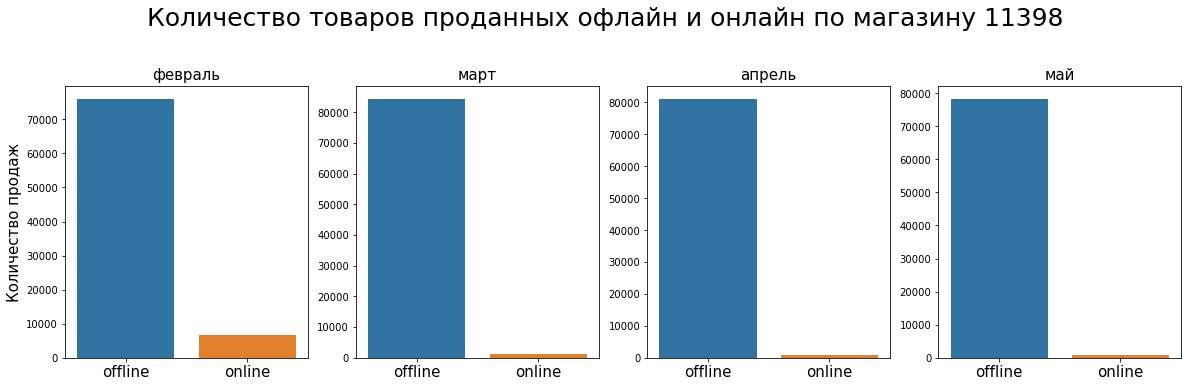

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle(f'Количество товаров проданных офлайн и онлайн по магазину {id_shop}', fontsize=font_title, y=1.1)
sns.countplot(ax=ax[0], x='order_type', data=df_shop.loc['2022-02-01':'2022-02-28'])
ax[0].set_ylabel('Количество продаж', fontsize = font_label)
ax[0].tick_params(axis='x', which='major', labelsize=font_label)
sns.countplot(ax=ax[1], x='order_type', data=df_shop.loc['2022-03-01':'2022-03-31'])
ax[1].tick_params(axis='x', which='major', labelsize=font_label)
sns.countplot(ax=ax[2], x='order_type', data=df_shop.loc['2022-04-01':'2022-04-30'])
ax[2].tick_params(axis='x', which='major', labelsize=font_label)
sns.countplot(ax=ax[3], x='order_type', data=df_shop.loc['2022-05-01':'2022-05-31'])
month = ['февраль', 'март', 'апрель', 'май']
for i in range(4):
    ax[i].set_title(month[i], fontsize=font_label)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', which='major', labelsize=font_label)
    
ax[0].set_ylabel('Количество продаж', fontsize = font_label)
plt.show()

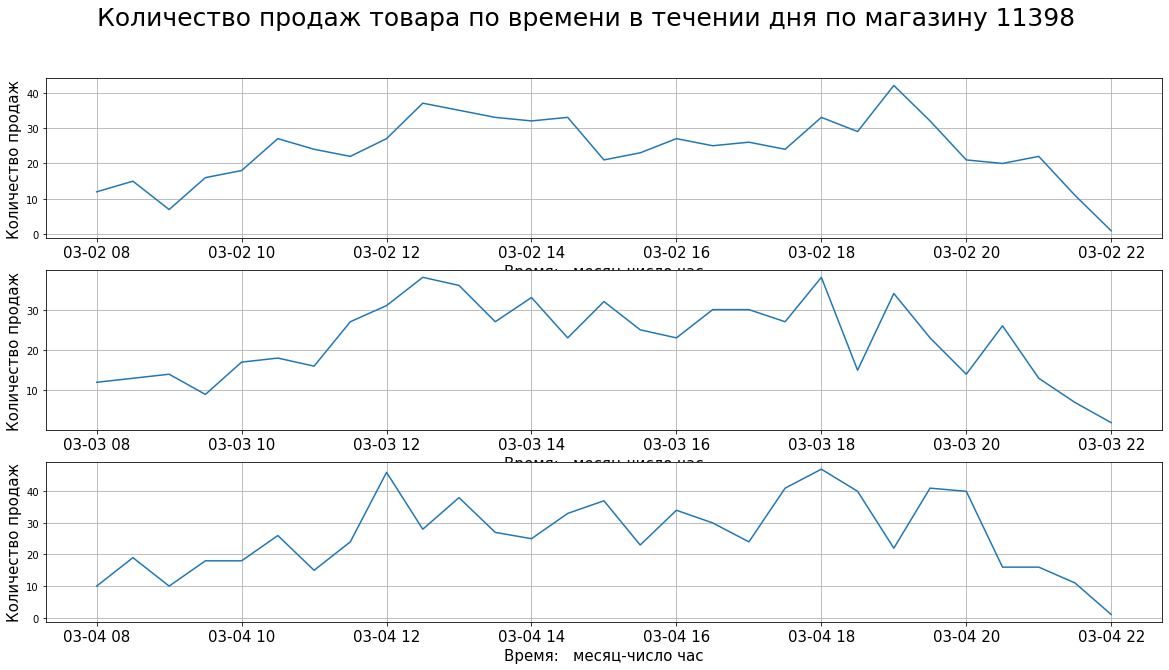

In [13]:
fig, ax = plt.subplots(3, figsize=(20,10))
fig.suptitle(f'Количество продаж товара по времени в течении дня по магазину {id_shop}', fontsize=font_title)
ax[0].plot(df_shop.loc['2022-03-02': '2022-03-02']['CheckUID'].resample('30T').nunique())
ax[1].plot(df_shop.loc['2022-03-03': '2022-03-03']['CheckUID'].resample('30T').nunique())
ax[2].plot(df_shop.loc['2022-03-04': '2022-03-04']['CheckUID'].resample('30T').nunique())
for i in range(3):
    ax[i].set_ylabel('Количество продаж', fontsize = font_label)
    ax[i].set_xlabel('Время:   месяц-число час', fontsize = font_label)
    ax[i].tick_params(axis='x', which='major', labelsize=font_label)
    ax[i].grid()

In [14]:
df_shop['hour_ch'] = df_shop['time_ch'].apply(lambda t: int(t.split(':')[0]))

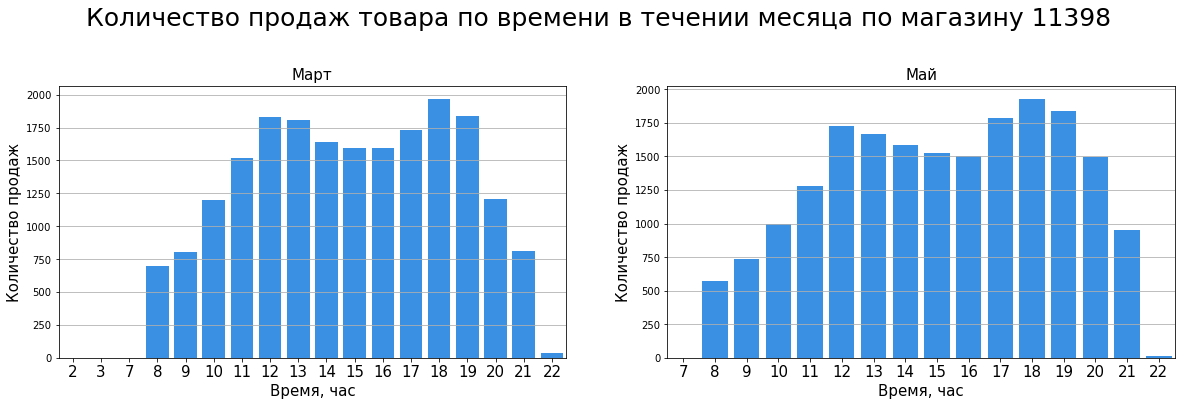

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle(f'Количество продаж товара по времени в течении месяца по магазину {id_shop}', fontsize=font_title, y=1.1)
sns.countplot(ax=ax[0], x=df_shop.loc['2022-03-01': '2022-03-31'].groupby(['CheckUID'])['hour_ch'].last(), color='dodgerblue')
ax[0].set_title('Март', fontsize=font_label)
sns.countplot(ax=ax[1], x=df_shop.loc['2022-05-01': '2022-05-31'].groupby(['CheckUID'])['hour_ch'].last(), color='dodgerblue')
ax[1].set_title('Май', fontsize=font_label)
for i in range(2):
    ax[i].set_ylabel('Количество продаж', fontsize = font_label)
    ax[i].set_xlabel('Время, час', fontsize = font_label)
    ax[i].tick_params(axis='x', which='major', labelsize=font_label)
    ax[i].grid(axis='y')
plt.show()

In [16]:
#среднее ежедневное количество продаж по времени за все месяцы
prod = df_shop.groupby(['CheckUID'])['hour_ch'].last().value_counts()
prod = prod/(28+31+30+31)
prod

18   63.08
12   60.17
19   58.64
17   58.35
13   57.33
14   53.92
16   52.49
15   50.92
11   45.72
20   42.00
10   35.49
21   27.28
9    25.21
8    21.58
22    0.72
7     0.03
3     0.02
2     0.01
Name: hour_ch, dtype: float64

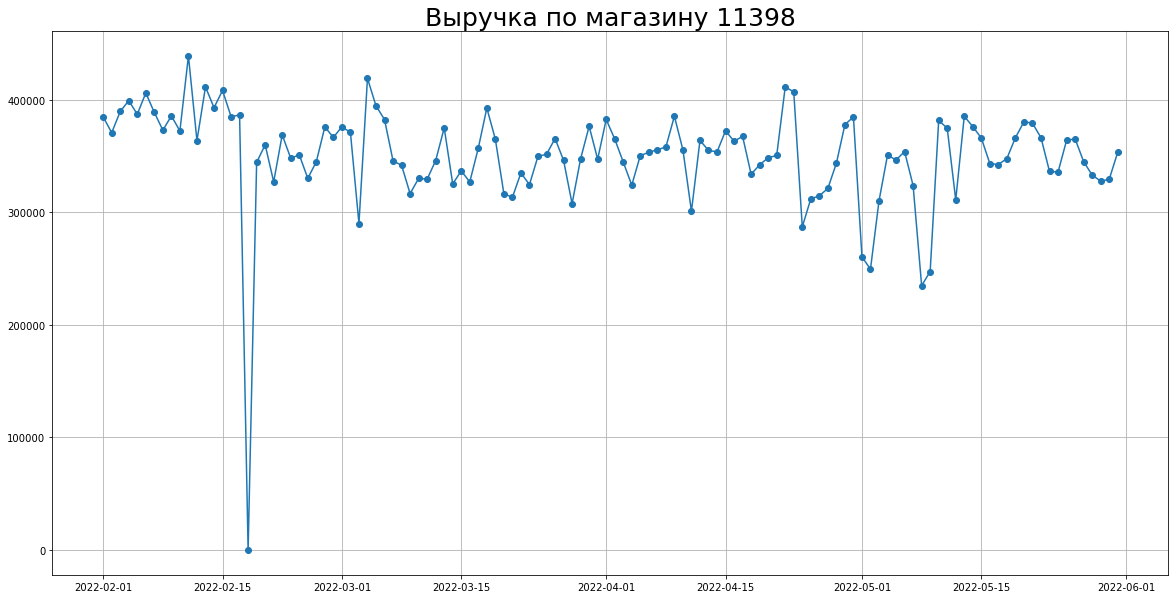

In [17]:
plt.figure(figsize=(20,10))
plt.title(f'Выручка по магазину {id_shop}', fontsize=font_title)
# в resample('7d') -указываем сколько дней агрегация, можно и другие указать типа 'w' - неделя
plt.plot(df_shop['BaseSum'].resample('d').sum(),  marker='o',)
plt.grid()
plt.show()

Разложение Выручки по магазину 11398


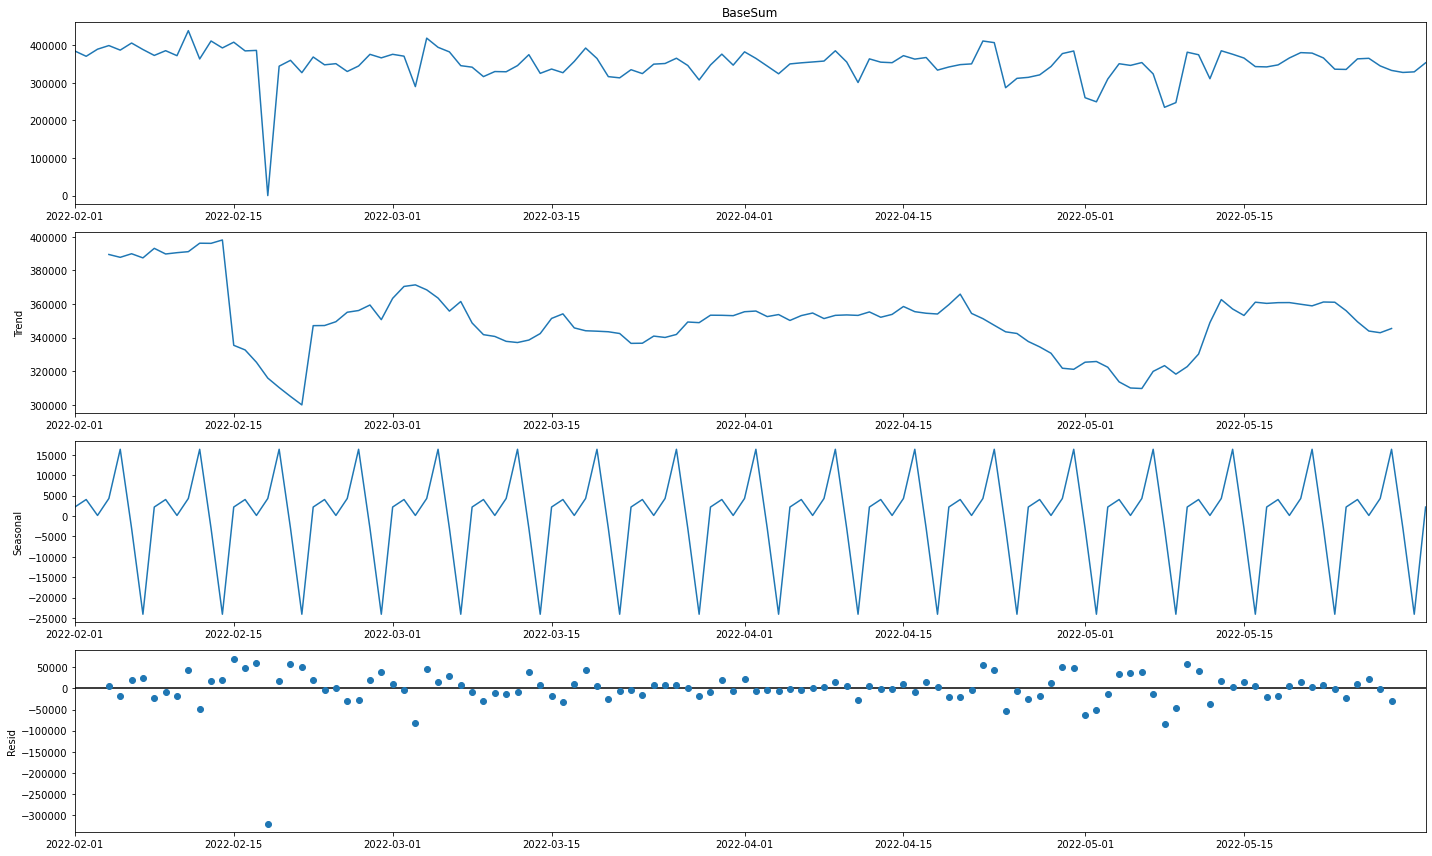

In [18]:
rcParams['figure.figsize'] = 20,12
print(f'Разложение Выручки по магазину {id_shop}')
decomposition = seasonal_decompose(df_shop['BaseSum'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

разложение количества проданного товара по магазину 11398


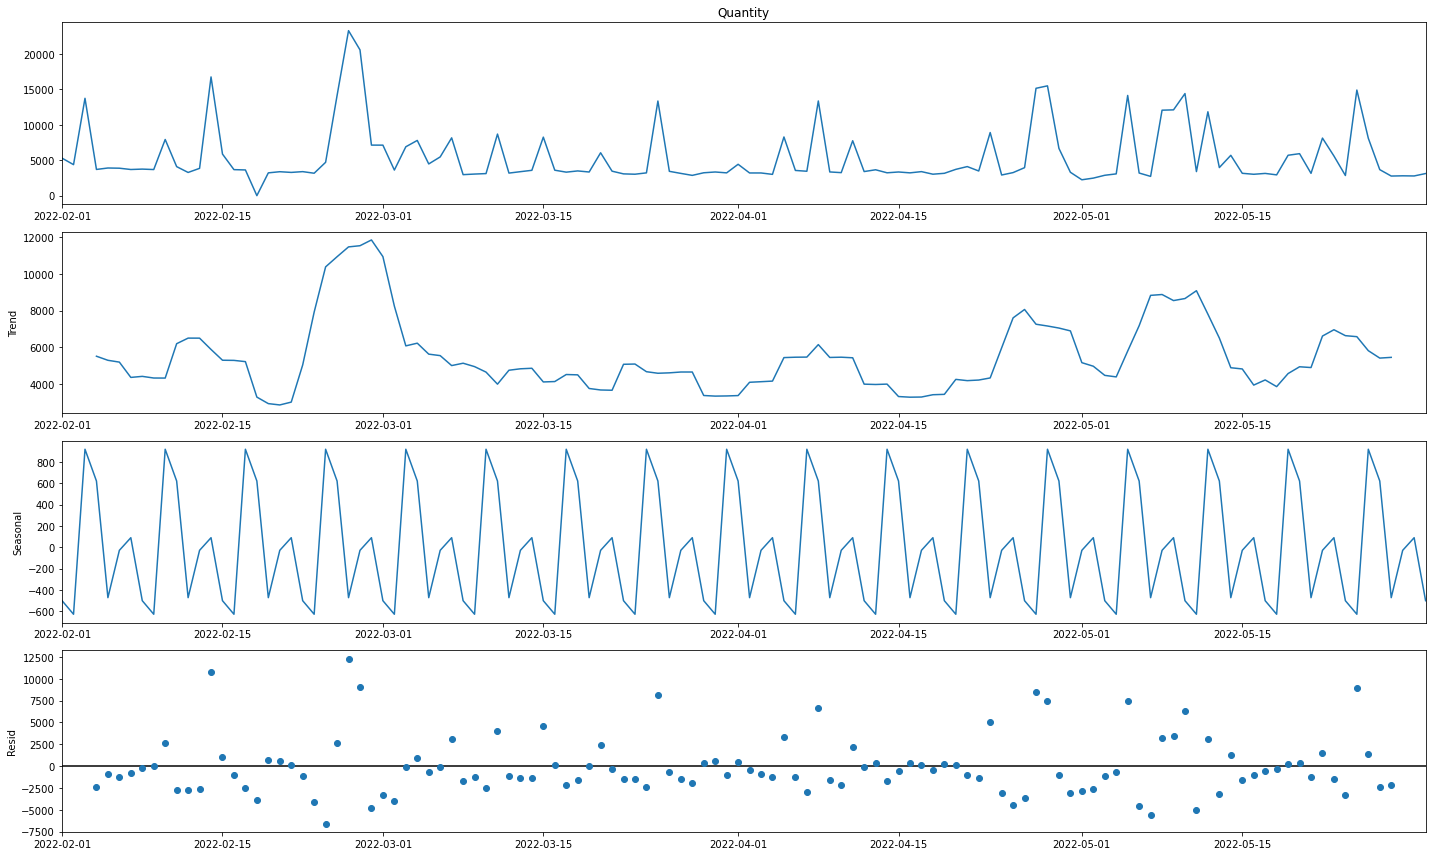

In [19]:
print(f'разложение количества проданного товара по магазину {id_shop}')
decomposition = seasonal_decompose(df_shop['Quantity'].resample('d').sum(), model='additive')
decomposition.plot()
plt.show()

In [20]:
# Количество продаж данного товара - сколько раз его купили за указанный период
df_shop.loc['2022-03-01': '2022-03-31']['name_tov'].value_counts()

Пакет-майка "Избёнка" малый                  4681
Молоко 3,2%                                  1161
Молоко цельное                                709
Бананы                                        681
Сметана 15%                                   581
                                             ... 
Гранат Рубиновый                                1
Кофе латте 0,4 на миндальном молоке, кафе       1
Кондиционер для белья "Утренняя роса"           1
Сидр яблочный сухой с вишневым соком            1
Торт "Наполеон" Айс                             1
Name: name_tov, Length: 3839, dtype: int64

In [21]:
# Количество продаж по подгруппам товаров - сколько раз купили за указанный период
df_shop.loc['2022-03-01': '2022-03-31']['name_gr2'].value_counts()

Сумки, пакеты, упаковка       4733
Молоко                        3167
Творог классика               2053
Вторые блюда                  1914
Кофе и чай для кафе           1758
                              ... 
Детские товары НонФуд (МБ)       1
Курица ГП                        1
Пиво. Сидр (ГП)                  1
Чай.Кофе.Какао ВП                1
Фрукты (ЭК)                      1
Name: name_gr2, Length: 268, dtype: int64

In [22]:
# Количество продаж по группам товаров - сколько раз купили за указанный период
df_shop.loc['2022-03-01': '2022-03-31']['name_gr'].value_counts()

Молочная Продукция                                14747
Овощи. Фрукты. Грибы. Зелень                       9701
Кулинария                                          8640
Хлеб                                               6936
Сладости, кондитерские изделия                     5964
Товары для дома                                    5489
Кафе                                               4889
Бакалея                                            4690
Мясо. Птица. П/ф охл. Яйца                         3229
Торты, пирожные, десерты                           2643
Рыба. Морепродукты                                 2615
Напитки                                            2510
Сыры                                               2143
Мясные деликатесы. Колбасы                         2019
Консервация                                        1560
Замороженные продукты                              1270
Замороженные десерты                               1247
Личная гигиена и уход                           

In [23]:
# Выручка по группам товаров 
df_shop.loc['2022-03-01': '2022-03-31'].groupby(['name_gr'])['BaseSum'].sum().sort_values(ascending=False)

name_gr
Молочная Продукция                               1,382,552.88
Кулинария                                        1,348,179.62
Овощи. Фрукты. Грибы. Зелень                     1,296,329.33
Мясо. Птица. П/ф охл. Яйца                         782,200.97
Рыба. Морепродукты                                 651,623.19
Сладости, кондитерские изделия                     611,677.77
Кафе                                               603,465.53
Бакалея                                            538,630.42
Торты, пирожные, десерты                           478,209.34
Мясные деликатесы. Колбасы                         450,799.23
Хлеб                                               425,405.95
Сыры                                               387,784.95
Замороженные продукты                              342,583.95
Напитки                                            233,489.13
Консервация                                        203,289.79
Сухофрукты. Сушеные овощи, грибы, ягоды. Орехи     137,610.49


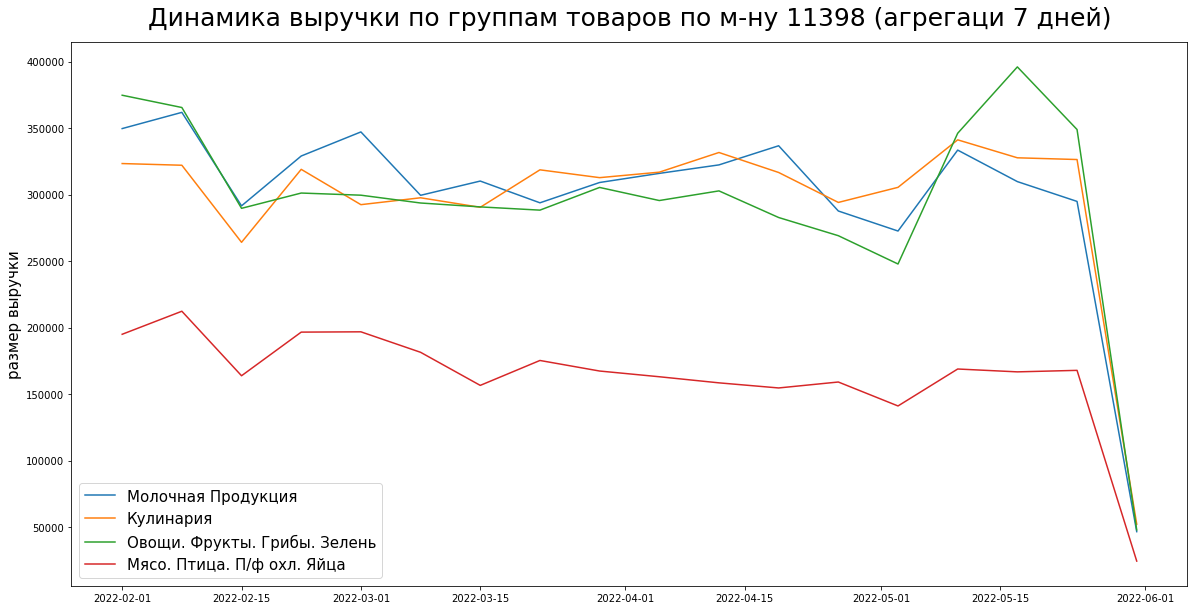

In [24]:
# В список включать необходимые группы
list_name_gr = ['Молочная Продукция', 'Кулинария', 'Овощи. Фрукты. Грибы. Зелень', 'Мясо. Птица. П/ф охл. Яйца' ]

plt.figure(figsize=(20,10))
plt.title(f'Динамика выручки по группам товаров по м-ну {id_shop} (агрегаци 7 дней)', fontsize=font_title, y=1.02)
for i in range(len(list_name_gr)):
    plt.plot(df_shop[df_shop['name_gr'] == list_name_gr[i]]['BaseSum'].resample('7d').sum(), label=list_name_gr[i])

plt.ylabel('размер выручки', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


In [25]:
# Выручка по группам товаров 
df_shop.loc['2022-03-01': '2022-03-31'].groupby(['name_gr2'])['BaseSum'].sum().sort_values(ascending=False)

name_gr2
Вторые блюда          334,258.08
Творог классика       329,494.74
Курица                303,021.77
Молоко                251,333.24
Кофе и чай для кафе   226,391.52
                         ...    
Сырьё для кафе            100.00
Пиво. Сидр (ГП)            70.83
Напитки айс                36.00
ХозТовары                   9.17
Служебные товары            0.00
Name: BaseSum, Length: 268, dtype: float64

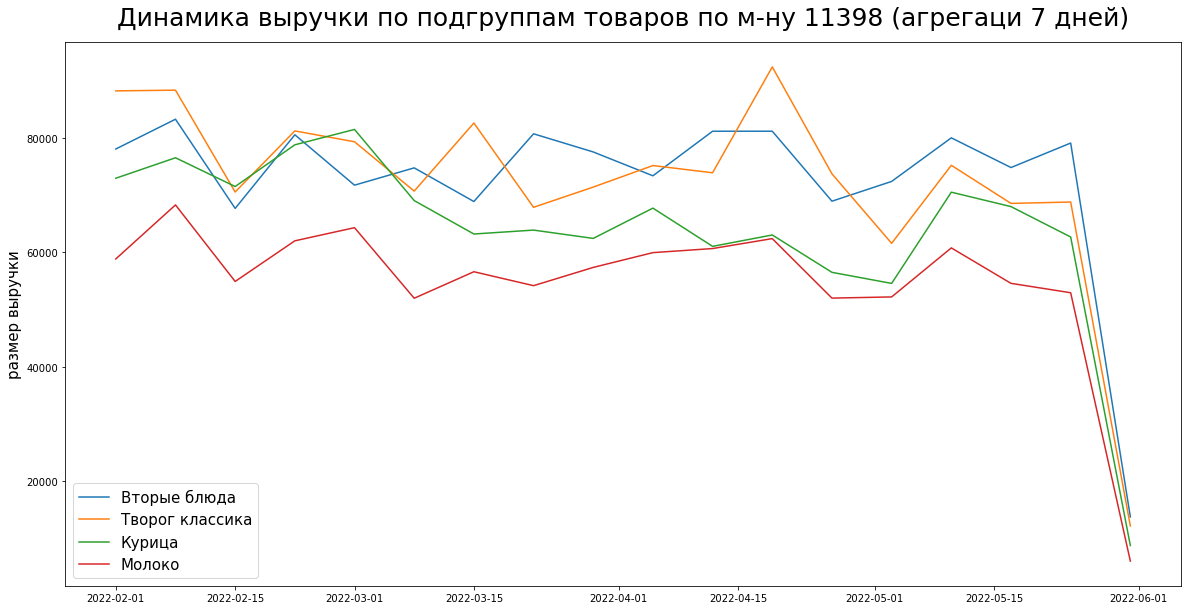

In [26]:
# В список включать необходимые группы
list_name_gr2 = ['Вторые блюда', 'Творог классика', 'Курица', 'Молоко' ]

plt.figure(figsize=(20,10))
plt.title(f'Динамика выручки по подгруппам товаров по м-ну {id_shop} (агрегаци 7 дней)', fontsize=font_title, y=1.02)
for i in range(len(list_name_gr2)):
    plt.plot(df_shop[df_shop['name_gr2'] == list_name_gr2[i]]['BaseSum'].resample('7d').sum(), label=list_name_gr2[i])

plt.ylabel('размер выручки', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


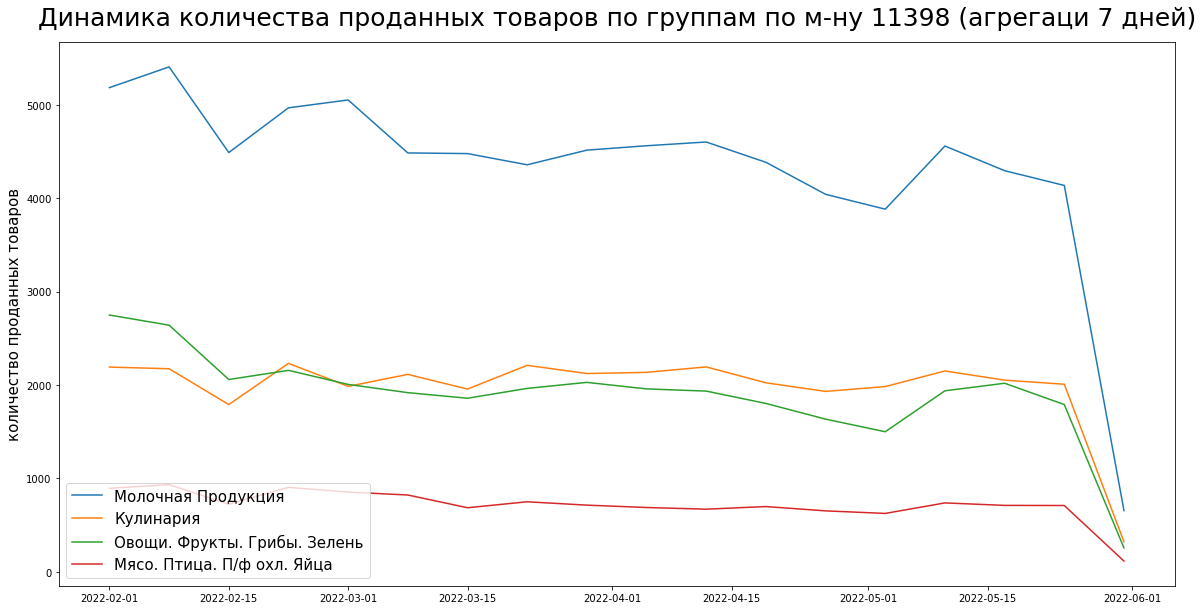

In [27]:
# В список включать необходимые группы
list_name_gr = ['Молочная Продукция', 'Кулинария', 'Овощи. Фрукты. Грибы. Зелень', 'Мясо. Птица. П/ф охл. Яйца' ]

plt.figure(figsize=(20,10))
plt.title(f'Динамика количества проданных товаров по группам по м-ну {id_shop} (агрегаци 7 дней)', fontsize=font_title, y=1.02)

for i in range(len(list_name_gr)):
    plt.plot(df_shop[df_shop['name_gr'] == list_name_gr[i]]['Quantity'].resample('7d').sum(), label=list_name_gr[i])

plt.ylabel('количество проданных товаров', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


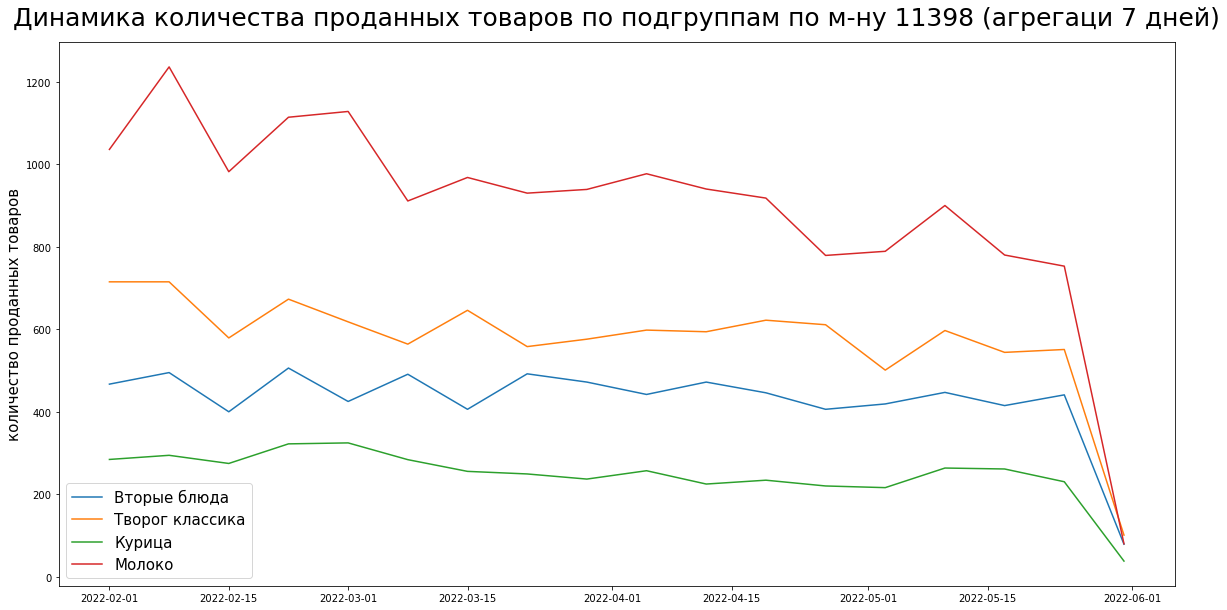

In [28]:
# В список включать необходимые группы
list_name_gr2 = ['Вторые блюда', 'Творог классика', 'Курица', 'Молоко' ]

plt.figure(figsize=(20,10))
plt.title(f'Динамика количества проданных товаров по подгруппам по м-ну {id_shop} (агрегаци 7 дней)', fontsize=font_title, y=1.02)
for i in range(len(list_name_gr2)):
    plt.plot(df_shop[df_shop['name_gr2'] == list_name_gr2[i]]['Quantity'].resample('7d').sum(), label=list_name_gr2[i])

plt.ylabel('количество проданных товаров', fontsize=font_label)
plt.legend(loc='lower left', fontsize=font_label)
plt.show()


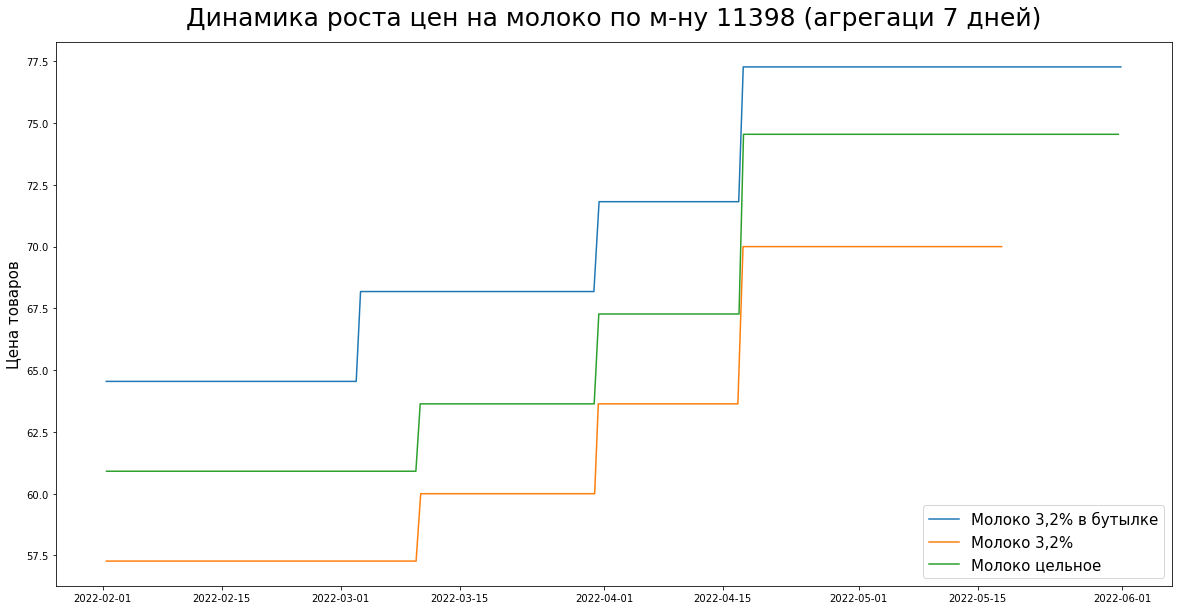

In [29]:
list_tovar = ['Молоко 3,2% в бутылке', 'Молоко 3,2%', 'Молоко цельное']

plt.figure(figsize=(20,10))
plt.title(f'Динамика роста цен на молоко по м-ну {id_shop} (агрегаци 7 дней)', fontsize=font_title, y=1.02)

for i in range(len(list_tovar)):
    plt.plot(df_shop[df_shop['name_tov'] == list_tovar[i]]['Price_retail'], label=list_tovar[i])

plt.ylabel('Цена товаров', fontsize=font_label)
plt.legend(loc='lower right', fontsize=font_label)
plt.show()

## Перечень групп/подгрупп товаров, которые дают top 80% выручки

In [30]:
def top_dohod(df, col='name_gr2', top=0.8):
    '''Можно задавть свой коэфициент топ и свою колонку, например группы "name_gr" или товары "name_tov"
    '''
    df = df.groupby(col)[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
    sum_top = df['BaseSum'].sum()*top
    print(top*100, '% выручки - ', int(sum_top))
    top_list = {}
    ne_top = {}
    sum_tov = 0
    for i in df.index:
        if sum_tov<sum_top:
            top_list[i] = int(df.loc[i]['BaseSum'])
            sum_tov += df.loc[i]['BaseSum']
        else:
            ne_top[i] = int(df.loc[i]['BaseSum'])
    
    return top_list, ne_top


In [31]:
top_list, ne_top = top_dohod(df_shop.loc['2022-03-01': '2022-03-31'])

80.0 % выручки -  8606380


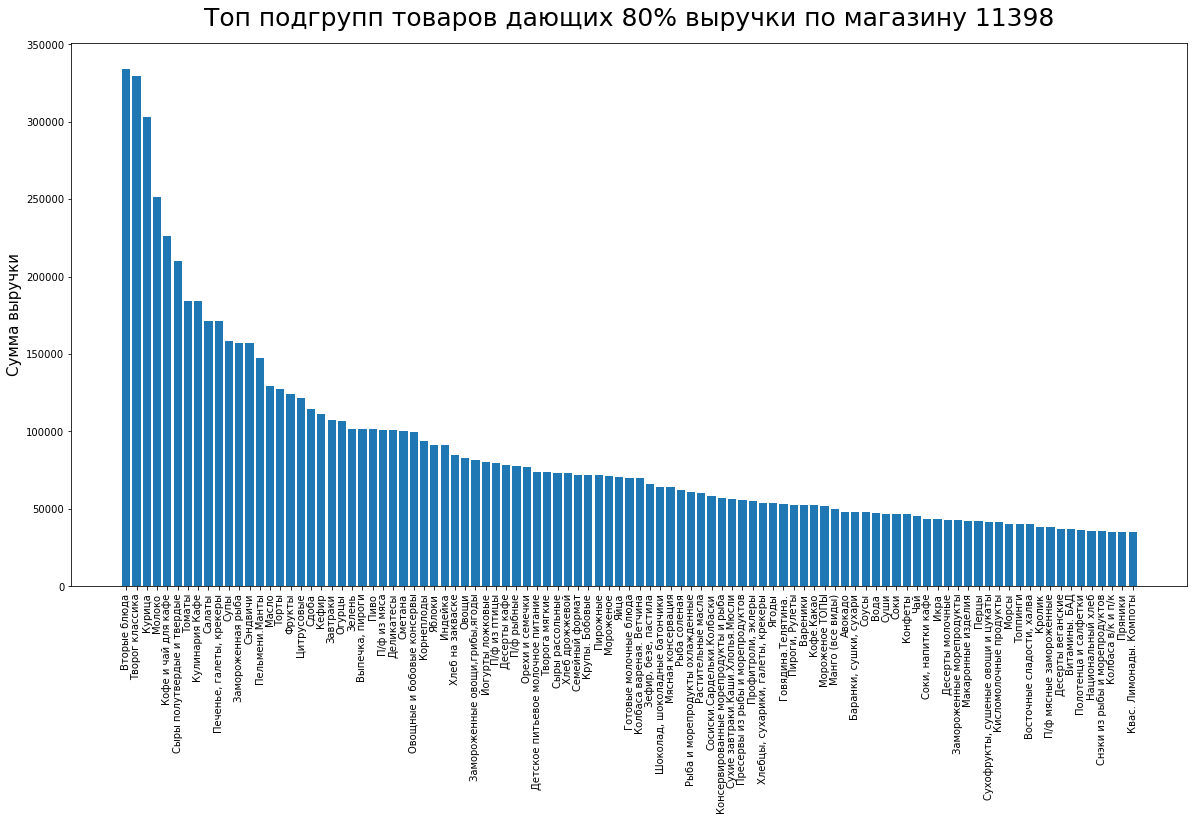

In [32]:
plt.figure(figsize=(20,10))
plt.title(f'Топ подгрупп товаров дающих 80% выручки по магазину {id_shop}', fontsize=font_title, y=1.02)
 
plt.bar(height = pd.Series(top_list), x=pd.Series(top_list).index)
plt.xticks(rotation=90)
plt.ylabel('Сумма выручки', fontsize=font_label)
plt.show()

In [33]:
pd.Series(top_list).head(10)

Вторые блюда                  334258
Творог классика               329494
Курица                        303021
Молоко                        251333
Кофе и чай для кафе           226391
Сыры полутвердые и твердые    210324
Томаты                        184402
Кулинария Кафе                184314
Салаты                        171470
Печенье, галеты, крекеры      171040
dtype: int64

In [34]:
# группировка в отдеьные датафреймы по месяцам
feb_tov = df_shop.loc['2022-02-01': '2022-02-28'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
feb_gr2 = df_shop.loc['2022-02-01': '2022-02-28'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

march_tov = df_shop.loc['2022-03-01': '2022-03-31'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
march_gr2 = df_shop.loc['2022-03-01': '2022-03-31'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

apr_tov = df_shop.loc['2022-04-01': '2022-04-30'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
apr_gr2 = df_shop.loc['2022-04-01': '2022-04-30'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

may_tov = df_shop.loc['2022-05-01': '2022-05-31'].groupby('name_tov')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
may_gr2 = df_shop.loc['2022-05-01': '2022-05-31'].groupby('name_gr2')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)


In [35]:
# топ товаров (установить в скобках) проданных в магазине (количество и сумма)
may_tov[:10]

,Quantity,BaseSum
name_tov,,
Клубника Краснодар,550.91,"308,659.34"
Творог 5%,575.00,"79,041.00"
Молоко цельное,"1,087.00","73,978.28"
Бананы,648.05,"58,955.95"
Капучино 0.3 (Кафе),512.00,"56,617.50"
Филе грудки цыпленка,154.23,"53,829.53"
"Молоко 3,2%",815.00,"53,025.38"
"Молоко 3,2% в бутылке",634.00,"47,735.23"
Творог 9%,283.00,"41,576.91"


## Чеки

In [36]:
chek_mean = {}
chek_median = {}

feb_mean = int(df_shop.loc['2022-02-01': '2022-02-28'].groupby('CheckUID')[['BaseSum']].sum().mean())
feb_median = int(df_shop.loc['2022-02-01': '2022-02-28'].groupby('CheckUID')[['BaseSum']].sum().median())
chek_mean['февраль'] = feb_mean
chek_median['февраль'] = feb_median

march_mean = int(df_shop.loc['2022-03-01': '2022-03-31'].groupby('CheckUID')[['BaseSum']].sum().mean())
march_median = int(df_shop.loc['2022-03-01': '2022-03-31'].groupby('CheckUID')[['BaseSum']].sum().median())
chek_mean['март'] = march_mean
chek_median['март'] = march_median

apr_mean = int(df_shop.loc['2022-04-01': '2022-04-30'].groupby('CheckUID')[['BaseSum']].sum().mean())
apr_median = int(df_shop.loc['2022-04-01': '2022-04-30'].groupby('CheckUID')[['BaseSum']].sum().median())
chek_mean['апрель'] = apr_mean
chek_median['апрель'] = apr_median

may_mean = int(df_shop.loc['2022-05-01': '2022-05-31'].groupby('CheckUID')[['BaseSum']].sum().mean())
may_median = int(df_shop.loc['2022-05-01': '2022-05-31'].groupby('CheckUID')[['BaseSum']].sum().median())
chek_mean['май'] = may_mean
chek_median['май'] = may_median

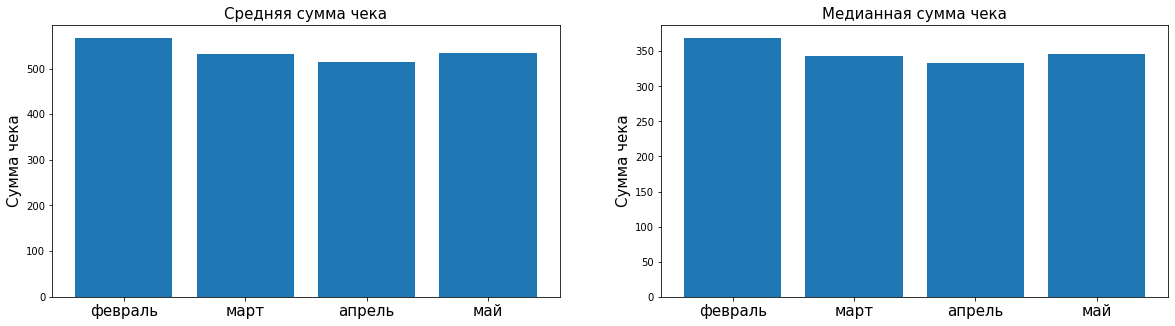

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))


ax[0].bar(height = pd.Series(chek_mean), x=pd.Series(chek_mean).index)
ax[0].set_title('Средняя сумма чека', fontsize=font_label)
ax[0].set_ylabel('Сумма чека', fontsize=font_label)
ax[0].tick_params(axis='x', which='major', labelsize=font_label)

ax[1].bar(height = pd.Series(chek_median), x=pd.Series(chek_median).index)
ax[1].set_title('Медианная сумма чека', fontsize=font_label)
ax[1].set_ylabel('Сумма чека', fontsize=font_label)
ax[1].tick_params(axis='x', which='major', labelsize=font_label)

plt.show()

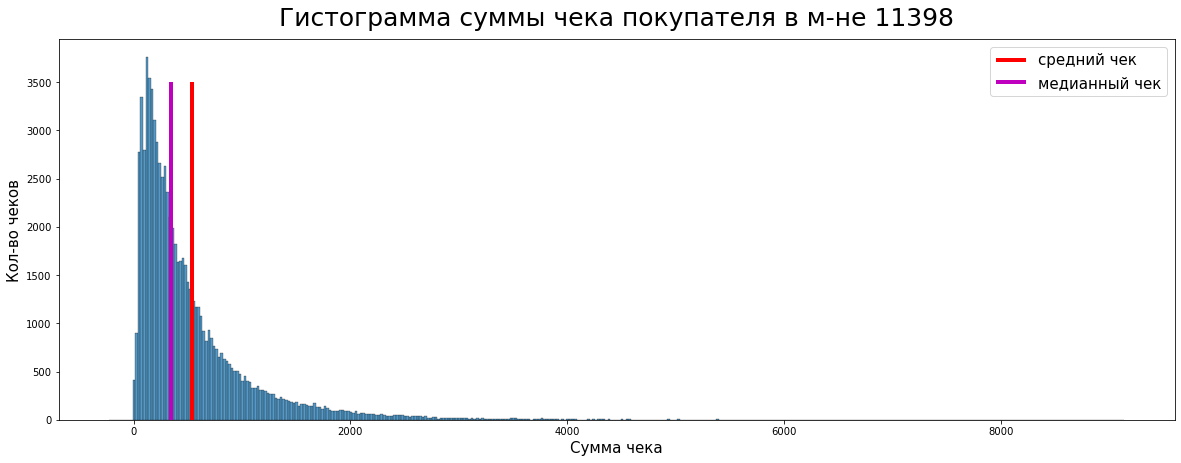

In [38]:
sum_chek = df_shop.groupby('CheckUID')[['BaseSum']].sum()
chek_mean = int(sum_chek['BaseSum'].mean())
chek_median = int(sum_chek['BaseSum'].median())

plt.figure(figsize=(20,7))
plt.title(f'Гистограмма суммы чека покупателя в м-не {id_shop}', fontsize=font_title, y=1.02)
sns.histplot(sum_chek['BaseSum'])
plt.vlines(x=chek_mean, ymin=0.0, ymax=3500,  label='средний чек', color = 'r', linewidth=4)
plt.vlines(x=chek_median, ymin=0.0, ymax=3500,  label='медианный чек', color = 'm', linewidth=4)

plt.xlabel('Сумма чека', fontsize=font_label)
plt.ylabel('Кол-во чеков', fontsize=font_label)
plt.legend(loc='upper right', fontsize=font_label)
plt.show()

Средний количесвто позиций в чеке: 4
Медианный количество позиций в чеке: 3


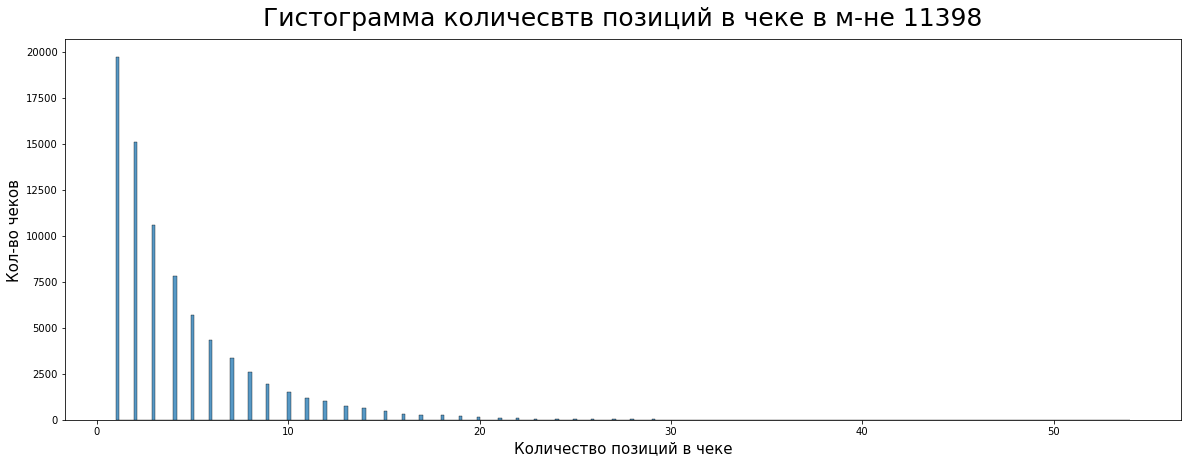

In [39]:
count_tov_chek = df_shop.groupby('CheckUID')[['BaseSum']].count()

count_tov_mean = int(count_tov_chek['BaseSum'].mean())
count_tov_median = int(count_tov_chek['BaseSum'].median())
print('Средний количесвто позиций в чеке:', count_tov_mean)
print('Медианный количество позиций в чеке:', count_tov_median)

plt.figure(figsize=(20,7))
plt.title(f'Гистограмма количесвтв позиций в чеке в м-не {id_shop}', fontsize=font_title, y=1.02)
sns.histplot(count_tov_chek['BaseSum'])
plt.xlabel('Количество позиций в чеке', fontsize=font_label)
plt.ylabel('Кол-во чеков', fontsize=font_label)
plt.show()

In [40]:
df_shop

,CheckUID,id_tt_cl,id_tov_cl,Price_retail,Quantity,BasePrice,BaseSum,date_ch,time_ch,order_type,name_tov,name_gr,name_gr2,date_time,hour_ch
date_time_ch,,,,,,,,,,,,,,,
2022-02-01 08:11:28,E263A705-1F83-EC11-9064-005056A7A8DF,11398,25150,22.50,1.00,22.50,22.50,2022-02-01,08:11:28,offline,"Зефир воздушный, 15 г","Сладости, кондитерские изделия","Зефир, безе, пастила",2022-02-01 08:11:28,8
2022-02-01 08:11:28,E263A705-1F83-EC11-9064-005056A7A8DF,11398,17724,79.17,1.00,79.17,79.17,2022-02-01,08:11:28,offline,"Сорбет ""Клубника-Базилик""",Замороженные десерты,Мороженое,2022-02-01 08:11:28,8
2022-02-01 08:11:28,E263A705-1F83-EC11-9064-005056A7A8DF,11398,48597,131.82,1.00,131.82,131.82,2022-02-01,08:11:28,offline,Беляши с мясом,Кулинария,"Выпечка, пироги",2022-02-01 08:11:28,8
2022-02-01 08:11:28,E263A705-1F83-EC11-9064-005056A7A8DF,11398,16552,159.09,1.00,159.09,159.09,2022-02-01,08:11:28,offline,"Филе индейки копчено-вареное, нарезка",Мясные деликатесы. Колбасы,Деликатесы,2022-02-01 08:11:28,8
2022-02-01 08:11:28,E263A705-1F83-EC11-9064-005056A7A8DF,11398,48474,100.00,1.00,100.00,100.00,2022-02-01,08:11:28,offline,"Сорбет ""Манго-Лайм""",Замороженные десерты,Мороженое,2022-02-01 08:11:28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 22:02:50,CA415FA4-15E1-EC11-9064-005056A7A8DF,11398,61504,154.55,1.00,92.73,92.73,2022-05-31,22:02:50,offline,"Булочка маковая, кафе",Кафе,"Выпечка, печенье кафе",2022-05-31 22:02:50,22
2022-05-31 22:02:50,CA415FA4-15E1-EC11-9064-005056A7A8DF,11398,51897,86.36,1.00,51.82,51.82,2022-05-31,22:02:50,offline,Крупа манная из твердой пшеницы,Бакалея,Крупы. Бобовые,2022-05-31 22:02:50,22
2022-05-31 22:02:50,CA415FA4-15E1-EC11-9064-005056A7A8DF,11398,36430,238.18,1.00,142.91,142.91,2022-05-31,22:02:50,offline,Биточки куриные с сыром,Мясо. Птица. П/ф охл. Яйца,П/ф из птицы,2022-05-31 22:02:50,22


In [41]:
time_chek = df_shop.groupby(['CheckUID'])['time_ch'].last()
time_chek = pd.DataFrame({'time':time_chek.values})
time_chek['count'] = 1


time_chek = time_chek.set_index(pd.to_datetime(time_chek['time'], format='%H:%M:%S'))
time_chek.drop(['time'], axis=1, inplace=True)
time_chek.sort_index(inplace=True)